# 概念
+ 时间戳：表示某个具体的时间
+ 时间间隔：表示开始时间与结束时间之间的长度
+ 周期：通常指一种特殊的时间间隔
+ 时间增量(time delta)或持续时间(duration)：表示精确的时间长度(如，某个程序运行持续时间22.2s)

## python的日期与时间工具

### 原生python时间处理工具

In [1]:
from datetime import datetime
datetime(year=2019, month=10, day=30)


datetime.datetime(2019, 10, 30, 0, 0)

使用`dateutil`模块对各种字符串格式的日期进行正确解析


In [2]:
from dateutil import parser
date = parser.parse('4th of July, 2019')
print(date)
date = parser.parse('20190411')
print(date)
date = parser.parse('2019/04/11')
print(date)


2019-07-04 00:00:00
2019-04-11 00:00:00
2019-04-11 00:00:00


In [3]:
# 打印今天是星期几
date.strftime('%A')

'Thursday'

### numpy的datetime64
+ 需要指定类型
+ 时区以本地电脑为准

In [8]:
import numpy as np
date = np.array('2019-01-02', dtype= np.datetime64)
date

array('2019-01-02', dtype='datetime64[D]')

有了日期格式，就可以进行向量话运算


In [28]:
date + np.arange(5)

array(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
       '2019-01-06'], dtype='datetime64[D]')

In [29]:
# 以天为单位
np.datetime64('2019-01-02')

numpy.datetime64('2019-01-02')

In [30]:
# 以分钟为单位
np.datetime64('2019-03-03 12:02')

numpy.datetime64('2019-03-03T12:02')

In [34]:
# 自己指定时间精度
np.datetime64('2019-03-05 12:33:59.11', 'ns')

numpy.datetime64('2019-03-05T12:33:59.110000000')

日期与时间单位格式代码

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

### Pandas 的日期与时间工具

In [26]:
import pandas as pd
date = pd.to_datetime('5th of May, 2019')
date

Timestamp('2019-05-05 00:00:00')

In [41]:
data.strftime('%A')

'Thursday'

进行向量化运算

In [46]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2019-05-05', '2019-05-06', '2019-05-07', '2019-05-08',
               '2019-05-09', '2019-05-10', '2019-05-11', '2019-05-12',
               '2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16'],
              dtype='datetime64[ns]', freq=None)

## Pandas时间序列：用时间做索引

In [69]:
date = np.datetime64('2019-01-29', 'D') + np.arange(5)
index = pd.DatetimeIndex(date)
index

DatetimeIndex(['2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02'],
              dtype='datetime64[ns]', freq=None)

In [70]:
data = pd.Series([1,2,3,4,5], index=index)
data

2019-01-29    1
2019-01-30    2
2019-01-31    3
2019-02-01    4
2019-02-02    5
dtype: int64

使用带有时间索引的切片

In [71]:
data['2019-01-04':'2019-01-06']

Series([], dtype: int64)

还可以根据年或者月索引

In [73]:
data['2019-01']

2019-01-29    1
2019-01-30    2
2019-01-31    3
dtype: int64

## Pandas时间序列数据结构

+ 针对时间戳数据，pandas提供了`Timestamp`
+ 针对时间周期数据, Pandas提供了`Period`
+ 针对时间增量, Pandas提供了`Timedelta`

In [80]:
dates = pd.to_datetime([datetime(2019,2,5), '6th of March, 2019',
                       '2019-Oct-20', '21-09-2019', '20191111'])
dates

DatetimeIndex(['2019-02-05', '2019-03-06', '2019-10-20', '2019-09-21',
               '2019-11-11'],
              dtype='datetime64[ns]', freq=None)

任何`DatetimeIndex`类型都可以通过`to_period()`方法和一个`频率代码`转换成`PeriodIndex`类型

In [81]:
dates.to_period('H')

PeriodIndex(['2019-02-05 00:00', '2019-03-06 00:00', '2019-10-20 00:00',
             '2019-09-21 00:00', '2019-11-11 00:00'],
            dtype='period[H]', freq='H')

当用一个日期减去另外一个日期时，返回的结果是`TimedeltaIndex`
时间间隔

In [83]:
dates - dates[0]

TimedeltaIndex(['0 days', '29 days', '257 days', '228 days', '279 days'], dtype='timedelta64[ns]', freq=None)

创建时间序列`pd.date_range(date1, date2)` 包括date2

In [85]:
pd.date_range('2019-06-11', '2019-06-21')

DatetimeIndex(['2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14',
               '2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18',
               '2019-06-19', '2019-06-20', '2019-06-21'],
              dtype='datetime64[ns]', freq='D')

`pd.date_range(date1, date2, period)`  
类似python的`range(start, end, step)`

In [87]:
pd.date_range('2019/02/11', '2019/03/11', periods=6)

DatetimeIndex(['2019-02-11 00:00:00', '2019-02-16 14:24:00',
               '2019-02-22 04:48:00', '2019-02-27 19:12:00',
               '2019-03-05 09:36:00', '2019-03-11 00:00:00'],
              dtype='datetime64[ns]', freq=None)

`pd.date_range(date1, periods, freq)` 
freq改变时间间隔， period指定周期


In [91]:
pd.date_range('2019/03/6', periods=5, freq='M')

DatetimeIndex(['2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31'],
              dtype='datetime64[ns]', freq='M')

创建有规律的周期或时间间隔序列`

In [92]:
pd.period_range('2019/05/05', periods=5, freq='M')

PeriodIndex(['2019-05', '2019-06', '2019-07', '2019-08', '2019-09'], dtype='period[M]', freq='M')

In [98]:
# 以一个小数递增的序列
delta = pd.timedelta_range(0, periods=10, freq='H')
delta

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [95]:
dates = pd.date_range('2019-04-1', periods=10, freq='D')
dates

DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10'],
              dtype='datetime64[ns]', freq='D')

In [99]:
dates + delta


DatetimeIndex(['2019-04-01 00:00:00', '2019-04-02 01:00:00',
               '2019-04-03 02:00:00', '2019-04-04 03:00:00',
               '2019-04-05 04:00:00', '2019-04-06 05:00:00',
               '2019-04-07 06:00:00', '2019-04-08 07:00:00',
               '2019-04-09 08:00:00', '2019-04-10 09:00:00'],
              dtype='datetime64[ns]', freq='25H')

## 时间频率与偏移量(offset)

Pandas 频率代码

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

使用频率组合创建时间周期  
如，2小时30分


In [100]:
pd.timedelta_range(0, periods=10, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00', '22:30:00'],
               dtype='timedelta64[ns]', freq='150T')

## 重新取样、迁移和窗口

In [21]:
from pandas_datareader import data

In [34]:
goog = data.DataReader('GOOG', 'yahoo', start='2014', end='2019')# , end=pd.datetime.now())
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,1003.539978,970.109985,973.900024,976.219971,1590300.0,976.219971
2018-12-26,1040.000000,983.000000,989.010010,1039.459961,2373300.0,1039.459961
2018-12-27,1043.890015,997.000000,1017.150024,1043.880005,2109800.0,1043.880005
2018-12-28,1055.560059,1033.099976,1049.619995,1037.079956,1414800.0,1037.079956
2018-12-31,1052.699951,1023.590027,1050.959961,1035.609985,1493300.0,1035.609985


In [35]:
goog = goog['Close']

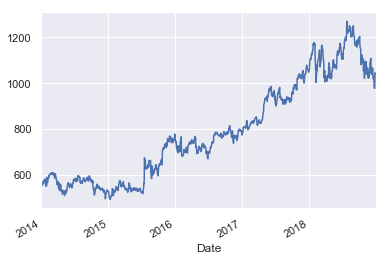

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
goog.plot()

### 重新取样与频率转换

+ `resample()`: 以数据累计(data aggregation)为基础
+ `asfreq()`: 以数据选择(data selection)为基础

在每个数据点上，`resample`反映的是上一年的均值  
而`asfreq`反映的是上一年最后一个工作日的收盘价


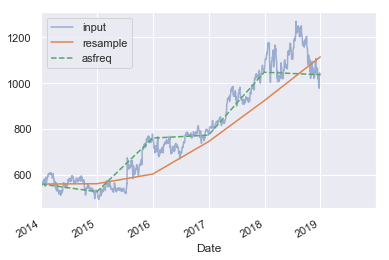

In [44]:
goog.plot(alpha=0.5, style='-')
# 采用BA年末， 最后一个工作日，对数据重新采样
goog.resample('BA').mean().plot(style='-')
goog.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')


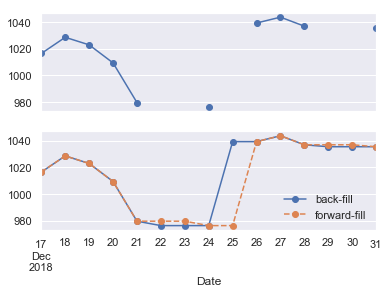

In [55]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[-10:]
data.asfreq('D').plot(ax=ax[0], marker='o')  # D：day
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(['back-fill', 'forward-fill'], loc='best', frameon=False)

### 时间迁移

+ `shift()` ：迁移数据
+ `tshift()`: 迁移索引

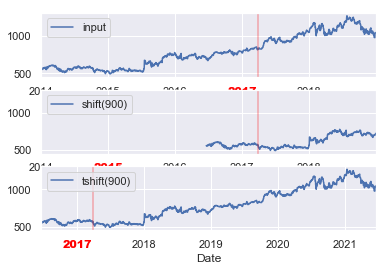

In [66]:
# 使用上述两种方法让数据迁移900天
fig, ax = plt.subplots(3, sharey=True)
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])

# 数据往前推进900天， 前面的一段数据会丢失
goog.shift(900).plot(ax=ax[1])

# 索引(时间)往前推移900天， 数据不变，时间变了
goog.tshift(900).plot(ax=ax[2])

# 设置图例与标签
local_max = pd.to_datetime('2014-10-11')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max+ offset, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

计算投资回报率(ROI)

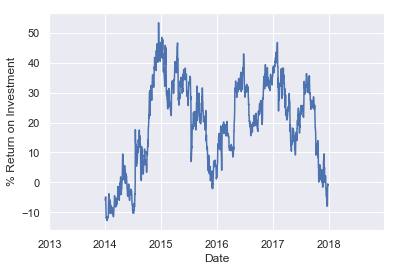

In [81]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');


### 移动时间窗口

移动统计值（rolling statistics）


In [83]:
goog.head()

Date
2013-12-31    558.262512
2014-01-01    558.262512
2014-01-02    554.481689
2014-01-03    550.436829
2014-01-04    550.436829
Freq: D, Name: Close, dtype: float64

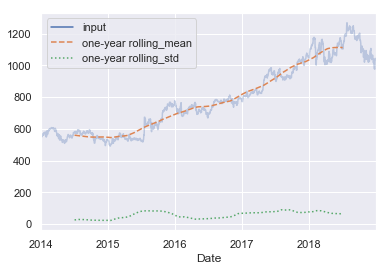

In [90]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

## 案例：美国西雅图自行车统计数据可视化


In [100]:
data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)[1:]
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2016-02-15 00:00:00,3.0,3.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0


In [101]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [110]:
data.dropna().describe()

,West,East,Total
count,61286.000000,61286.000000,61286.000000
mean,52.895604,61.445828,114.341432
std,67.816204,89.876404,145.211894
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,30.000000,62.000000
75%,71.000000,74.000000,150.000000
max,698.000000,850.000000,1097.000000


Text(0, 0.5, 'Hourly Bicycle Count')

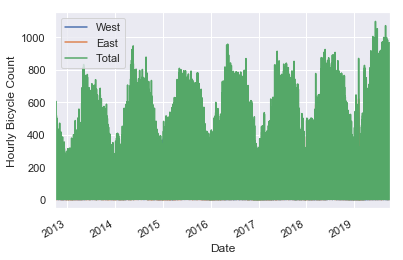

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Weekly Bicycle Count')

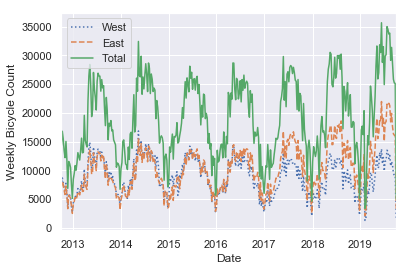

In [117]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly Bicycle Count')

Text(0, 0.5, 'mean of 30 days count')

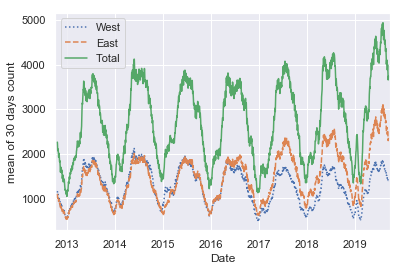

In [139]:
# 30天移动均值
daily = data.resample('D').sum()
daily.rolling(30, center=True).mean().plot(style=[':', '--', '-'])
plt.ylabel('mean of 30 days count')


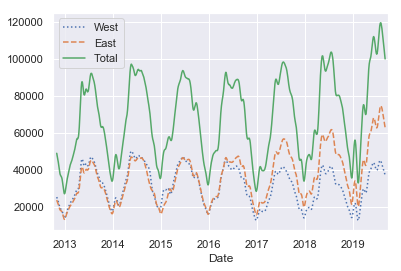

In [146]:
daily.rolling(50, center=True,
             win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

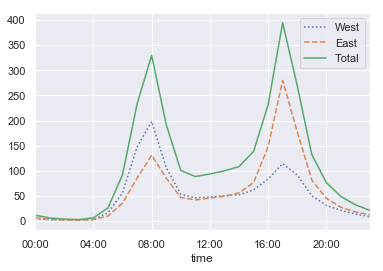

In [169]:
# 按时间段划分
by_time = data.groupby(data.index.time).mean()
# 每四个小时一个划分，自动转换成time类型
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

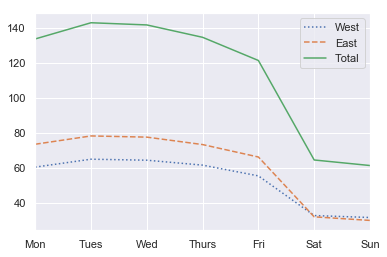

In [177]:
by_week = data.groupby(data.index.dayofweek).mean()
by_week.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_week.plot(style=[':', '--', '-'])

In [187]:
weekend = np.where(data.index.weekday<5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()


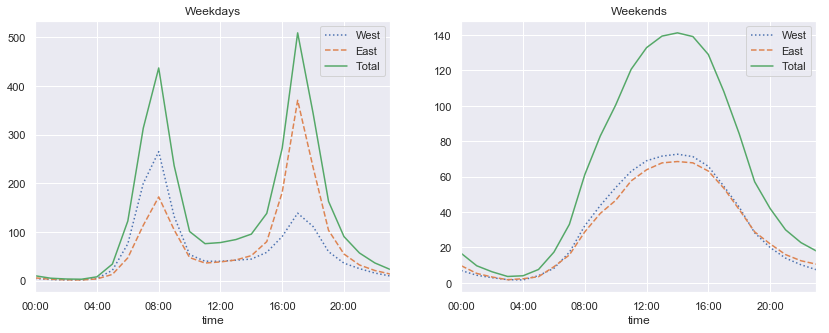

In [188]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);